In [1]:
import os
import numpy as np
from coffea import processor, util, hist

%matplotlib inline
import matplotlib.pyplot as plt
# import mplhep
# plt.style.use(mplhep.style.ATLAS)

from boostedhiggs import HbbProcessor, BTagEfficiency
from coffea.nanoaod import NanoEvents

In [2]:
events = NanoEvents.from_file(
    'data/ZJetsToQQ_HT400to600_qc19_4j_TuneCP5_13TeV-madgraphMLM-pythia8.root',
    entrystop=100000,
    metadata={'dataset': 'ZJetsToQQ_HT400to600_qc19_4j_TuneCP5_13TeV-madgraphMLM-pythia8'}
)

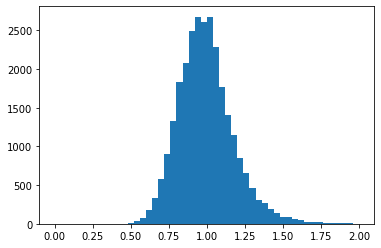

In [3]:
plt.hist(events.btagWeight.DeepCSVB, bins=np.linspace(0, 2, 51));

In [4]:
p = HbbProcessor(year='2017')
out = p.process(events)

/Users/ncsmith/src/uproot-methods/uproot_methods/classes/TLorentzVector.py:189: RuntimeWarning: invalid value encountered in sqrt
  return self._trymemo("mass", lambda self: self.awkward.numpy.sqrt(self.mag2))
/Users/ncsmith/src/awkward-array/awkward/array/jagged.py:1035: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ncsmith/src/awkward-array/awkward/array/jagged.py:1035: RuntimeWarning: invalid value encountered in greater
  result = getattr(ufunc, method)(*inputs, **kwargs)


(0, 1000)

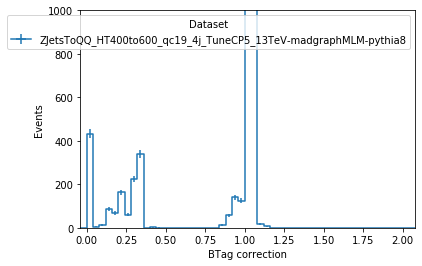

In [8]:
ax = hist.plot1d(out['btagWeight'], overflow='allnan')
ax.set_ylim(0, 1000)

In [9]:
p = HbbProcessor(year='2017')

files = [
    'data/ZJetsToQQ_HT-800toInf_qc19_4j_TuneCP5_13TeV-madgraphMLM-pythia8.root',
    'data/ZJetsToQQ_HT600to800_qc19_4j_TuneCP5_13TeV-madgraphMLM-pythia8.root',
    'data/ZJetsToQQ_HT400to600_qc19_4j_TuneCP5_13TeV-madgraphMLM-pythia8.root',
    'data/TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8.root',
]
files = {os.path.basename(file)[:-5]: [file] for file in files}
args = {'nano': True, 'workers': 4, 'savemetrics': True}
out, metrics = processor.run_uproot_job(files, 'Events', p, processor.futures_executor, args)

xs = {
    'ZJetsToQQ_HT-800toInf_qc19_4j_TuneCP5_13TeV-madgraphMLM-pythia8': 18.67,
    'ZJetsToQQ_HT600to800_qc19_4j_TuneCP5_13TeV-madgraphMLM-pythia8': 34.0,
    'ZJetsToQQ_HT400to600_qc19_4j_TuneCP5_13TeV-madgraphMLM-pythia8': 145.4,
    'TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8': 365.34,
}
scale1fb = {k: xs[k] * 1000 / w for k, w in out['sumw'].items()}
out['templates'].scale(scale1fb, 'dataset')

pmap = {
    'ZJets': [
        'ZJetsToQQ_HT-800toInf_qc19_4j_TuneCP5_13TeV-madgraphMLM-pythia8',
        'ZJetsToQQ_HT600to800_qc19_4j_TuneCP5_13TeV-madgraphMLM-pythia8',
        'ZJetsToQQ_HT400to600_qc19_4j_TuneCP5_13TeV-madgraphMLM-pythia8',
    ],
    'Top': [
        'TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8',
    ],
}
templates = out['templates'].group('dataset', hist.Cat('process', 'Process'), pmap)

/Users/ncsmith/src/uproot-methods/uproot_methods/classes/TLorentzVector.py:189: RuntimeWarning: invalid value encountered in sqrt
  return self._trymemo("mass", lambda self: self.awkward.numpy.sqrt(self.mag2))
/Users/ncsmith/src/awkward-array/awkward/array/jagged.py:1035: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ncsmith/src/uproot-methods/uproot_methods/classes/TLorentzVector.py:189: RuntimeWarning: invalid value encountered in sqrt
  return self._trymemo("mass", lambda self: self.awkward.numpy.sqrt(self.mag2))
/Users/ncsmith/src/uproot-methods/uproot_methods/classes/TLorentzVector.py:189: RuntimeWarning: invalid value encountered in sqrt
  return self._trymemo("mass", lambda self: self.awkward.numpy.sqrt(self.mag2))
/Users/ncsmith/src/awkward-array/awkward/array/jagged.py:1035: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ncsmith/src/awkward-array/awkwa

/Users/ncsmith/src/awkward-array/awkward/array/jagged.py:1035: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ncsmith/src/awkward-array/awkward/array/jagged.py:1035: RuntimeWarning: invalid value encountered in greater
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ncsmith/src/awkward-array/awkward/array/jagged.py:1035: RuntimeWarning: invalid value encountered in greater
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ncsmith/src/uproot-methods/uproot_methods/classes/TLorentzVector.py:189: RuntimeWarning: invalid value encountered in sqrt
  return self._trymemo("mass", lambda self: self.awkward.numpy.sqrt(self.mag2))
/Users/ncsmith/src/awkward-array/awkward/array/jagged.py:1035: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ncsmith/src/awkward-array/awkward/array/jagged.py:1035: RuntimeWarning: invalid value encountered in greater
  re

(0.95, 1.05)

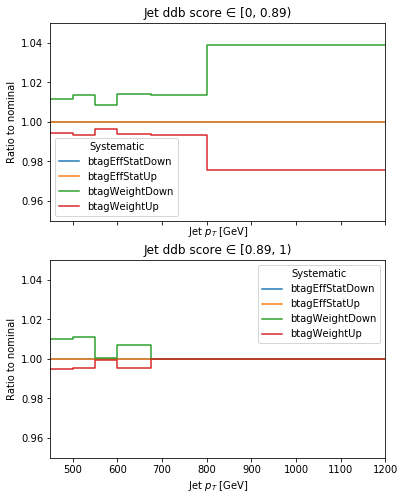

In [16]:
x = templates.integrate('process').integrate('region', 'signal').sum('genflavor', 'msd')
nom = x.values()[('nominal',)].copy()
for syst in x.identifiers('systematic'):
    x.values()[(syst.name,)] /= nom

x.label = 'Ratio to nominal'
axes = hist.plotgrid(x['btag*'], row='ddb', overlay='systematic', line_opts={})
axes[0, 0].set_ylim(0.95, 1.05)
# axes[0, 0].figure.savefig('triggerTurnOn_2017ZJets.pdf')

In [13]:
x #.values()

<Hist (systematic,pt,ddb) instance at 0x12e614a90>

In [23]:
client.close()
client = None

In [19]:
from dask.distributed import Client

client = Client('coffea-dask.fnal.gov:8786')
# client = Client('localhost:8788')
# client = Client()
client

/usr/local/lib/python3.7/site-packages/distributed/client.py:1071: VersionMismatchWarning: Mismatched versions found

tornado
+---------------------------+---------+
|                           | version |
+---------------------------+---------+
| client                    | 5.1.1   |
| scheduler                 | 6.0.3   |
| tcp://10.128.40.136:35203 | 6.0.3   |
| tcp://10.128.48.149:34515 | 6.0.3   |
| tcp://10.128.48.150:46042 | 6.0.3   |
| tcp://10.129.10.124:35957 | 6.0.3   |
| tcp://10.129.16.110:36683 | 6.0.3   |
| tcp://10.129.18.117:45404 | 6.0.3   |
| tcp://10.129.18.118:35226 | 6.0.3   |
| tcp://10.129.2.114:40186  | 6.0.3   |
| tcp://10.129.26.142:34505 | 6.0.3   |
| tcp://10.129.36.165:45956 | 6.0.3   |
| tcp://10.129.38.112:44645 | 6.0.3   |
| tcp://10.129.4.106:44536  | 6.0.3   |
| tcp://10.129.42.127:39375 | 6.0.3   |
| tcp://10.129.44.122:38504 | 6.0.3   |
| tcp://10.129.6.151:40460  | 6.0.3   |
| tcp://10.130.38.133:43985 | 6.0.3   |
| tcp://10.130.6.119:39170  | 6.0.

Client Scheduler: tcp://coffea-dask.fnal.gov:8786 Dashboard: http://coffea-dask.fnal.gov:8787/status,Cluster Workers: 20 Cores: 80 Memory: 251.11 GB


In [22]:
p = HbbProcessor(year='2017')

exe_config = {
    'client': client,
    'savemetrics': True,
    'nano': True,
#     'worker_affinity': True,
#     'cachestrategy': 'dask-worker',
}

output_mc, metrics = processor.run_uproot_job(
    'fileset_zwtop.json', 'Events', p, processor.dask_executor, exe_config, maxchunks=100,
)

[                                        ] | 0% Completed | 35.8s

KeyboardInterrupt: 

In [24]:
from coffea import util
util.save(output_mc, 'hbbZWTop2017.coffea')

In [22]:
from boostedhiggs import BTagEfficiency
p = BTagEfficiency(year='2017')

exe_config = {
    'client': client,
    'savemetrics': True,
    'nano': True,
    'worker_affinity': True,
    'cachestrategy': 'dask-worker',
}

btag, bmetrics = processor.run_uproot_job(
    'fileset_qcd.json', 'Events', p, processor.dask_executor, exe_config,
)

In [23]:
from coffea import util
util.save(btag, 'btagQCD2017.coffea')

In [11]:
evtrate = metrics['entries'].value / metrics['processtime'].value
print("Events / s / thread: %.0f" % evtrate)

Events / s / thread: 3492


In [17]:
metrics['bytesread'].value / 1e9 / (14*60+49) * 8

5.7602844347176605

In [ ]:
from distributed import get_worker
print(client.run(lambda: repr(get_worker().plugins['columncache'].hits)))
print(client.run(lambda: repr(get_worker().plugins['columncache'].misses)))
print(client.run(lambda: repr(get_worker().plugins['columncache'].cache)))

In [ ]:
from coffea.processor.dask import ColumnCache
class w:
    local_directory = '.'

c = ColumnCache()
c.setup(w())

In [ ]:
c.misses

In [ ]:
files = {
    'data': [
        'data/EGamma-Run2018D.root'
    ],
}

p = HbbProcessor(year='2018')
exe_config = {
    'workers': 4,
    'savemetrics': True,
    'nano': True,
}

output, metrics = processor.run_uproot_job(files, 'Events', p, processor.futures_executor, exe_config)

evtrate = metrics['entries'].value / metrics['processtime'].value
print("Events / s / thread: %.0f" % evtrate)